In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc     # 한글 깨짐 문제 해결 함수

In [2]:
# 데이터 셋을 불러옵니다.
# 애초에 분석하기 앞서 목표가 지역별 매출 규모를 파악하는 것이기 때문에 두 칼럼만 뽑아왔음.

dataset = pd.read_csv('data/funda_train.csv', usecols=['region', 'amount'])
dataset

,region,amount
0,NaN,1857.142857
1,NaN,857.142857
2,NaN,2000.000000
3,NaN,7857.142857
4,NaN,2000.000000
...,...,...
6556608,제주 제주시,-4500.000000
6556609,제주 제주시,4142.857143
6556610,제주 제주시,4500.000000
6556611,제주 제주시,571.428571


In [3]:
# 데이터의 정보를 확인합니다
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   region  object 
 1   amount  float64
dtypes: float64(1), object(1)
memory usage: 100.0+ MB


In [4]:
# 지역 데이터 확인
print('Nan 지역 데이터 개수 : ', dataset['region'].value_counts(dropna=False)[0])
print('Nan 제외 지역 데이터 개수 : ',dataset['region'].describe()[0])
print(dataset['region'].value_counts())

Nan 지역 데이터 개수 :  2042766
Nan 제외 지역 데이터 개수 :  4513847
경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
           ...  
경남 거창군      1143
서울 관악구      1037
경남 함안군       878
경북 영천시       849
전남 완도군       681
Name: region, Length: 180, dtype: int64


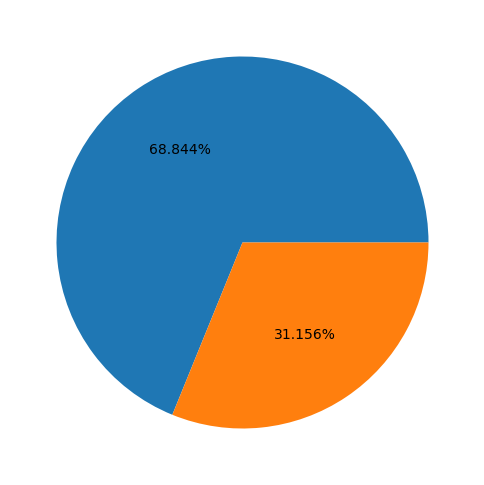

In [5]:
# Nan 값과 지역이 있는 값의 비율을 보여주는 그래프

plt.figure(figsize=(6, 9))
plt.pie(dataset.region.isna().value_counts(), autopct='%.3f%%')
plt.show()

In [6]:
grouped = dataset['amount'].groupby(dataset['region'])
grouped

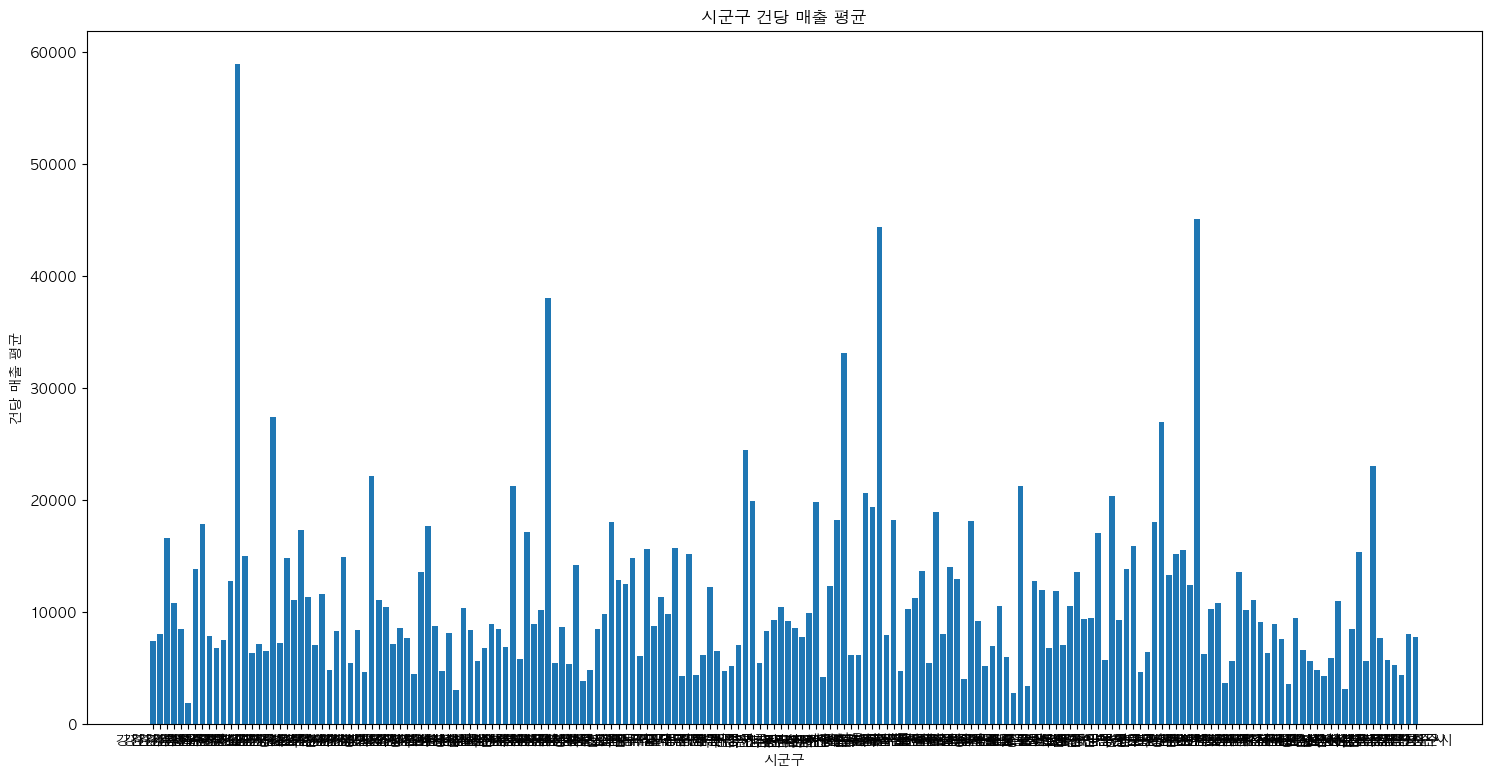

In [7]:
# ont_path = 'font/NanumBarunGothic.ttf' # 로컬에 font 폴더의 파일 경로 지정 (상대경로임)
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
# 위 코드는 시행해봤지만 작동안함..

# 그래서 추가한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(18,9))
plt.bar(grouped.mean().index, grouped.mean().values)
plt.xlabel('시군구')
plt.ylabel('건당 매출 평균')
plt.title('시군구 건당 매출 평균')
plt.show()

보기에 굉장히 까다롭고 한눈에 들어오지도 않음. 따라서 더 큰 분류인 광역시, 도별 분류를 적용할 계획임

# 도별, 광역시 별 분류 작업 시행 

1. 그룹화 시행
2. 평균치 구하기 
3. 합계 구하기
4. 결제 건수 구하기

## 1. 그룹화 시행

In [8]:
# 시도구분 데이터 칼럼 생성
dataset['region'] = dataset['region'].fillna('모름')
dataset['시도구분'] = dataset['region'].str[0:2]
dataset = dataset.reindex(columns=['시도구분', 'region', 'amount'])
dataset

,시도구분,region,amount
0,모름,모름,1857.142857
1,모름,모름,857.142857
2,모름,모름,2000.000000
3,모름,모름,7857.142857
4,모름,모름,2000.000000
...,...,...,...
6556608,제주,제주 제주시,-4500.000000
6556609,제주,제주 제주시,4142.857143
6556610,제주,제주 제주시,4500.000000
6556611,제주,제주 제주시,571.428571


In [9]:
# 시도구분 별 매출을 그룹화 (평균을 구하기 때문에 단위는 변환하지 않음)
grouped_dataset = dataset['amount'].groupby(dataset['시도구분'])

## 2. 평균치 구하기

In [10]:
# 주의해야 할 점은, 평균 데이터 값의 해석임
# 1건당 평균 결제액으로 해석해야 함

print('시도구분별 1건당 평균 결제액 (단위 : 원) \n',(grouped_dataset.mean()))
print('\n전체 지역 결제 건당 평균 결제액 (단위 : 원)\n', int(dataset['amount'].mean()),'원')

시도구분별 1건당 평균 결제액 (단위 : 원) 
 시도구분
강원    10565.005458
경기    11068.609791
경남     7745.300733
경북    10026.672105
광주    13032.442798
대구     9713.765159
대전     8474.208232
모름     9482.203503
부산    11353.932371
서울    15048.562574
세종    11927.786908
울산    10193.322646
인천    12108.502793
전남    13093.085170
전북    10288.835047
제주     7877.637669
충남     7669.054659
충북     7608.665441
Name: amount, dtype: float64

전체 지역 결제 건당 평균 결제액 (단위 : 원)
 10435 원


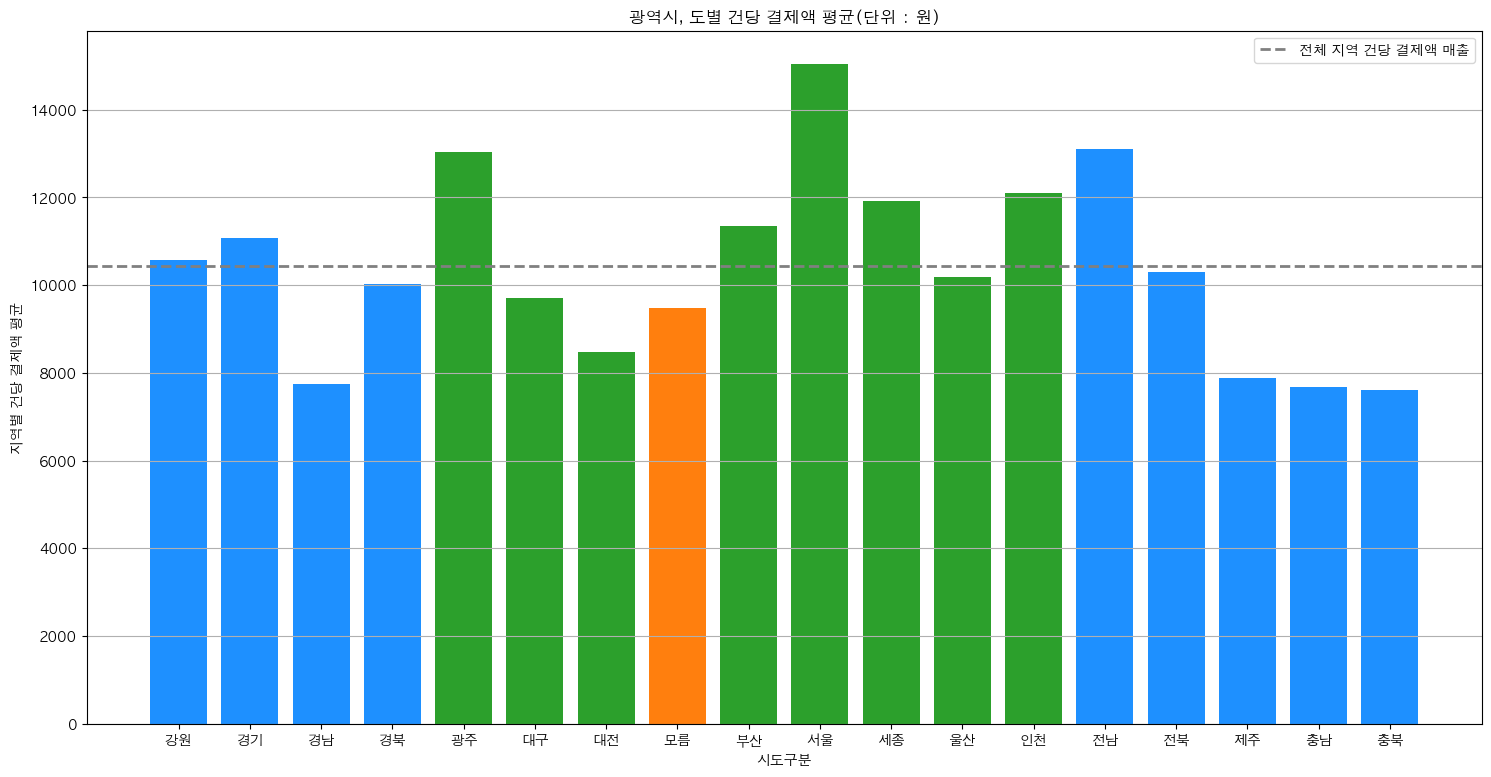

In [11]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지
c1 = ['dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue',\
        'C2','C2','C2','tab:orange','C2','C2','C2', 'C2','C2',\
        'dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue', 'dodgerblue']

plt.bar(grouped_dataset.mean().index, 
        grouped_dataset.mean().values, color = c1)             # 광역시, 도별 평균 매출 그래프
plt.axhline(y=dataset['amount'].mean(), color= 'gray',
            linestyle='dashed', linewidth = 2, 
            label='전체 지역 건당 결제액 매출')       # 전체 지역 평균 매출 그래프 추가
plt.grid(True, axis='y')

plt.xlabel('시도구분')
plt.ylabel('지역별 건당 결제액 평균')
plt.legend(loc='best')
plt.title('광역시, 도별 건당 결제액 평균(단위 : 원)')

plt.show()
plt.tight_layout()

## 3. 합계 구하기

In [12]:
# 모르는 지역은 제외

dataset_dropna = dataset.loc[(dataset['region']) != '모름']
dataset_dropna = dataset_dropna.reset_index(drop=True)
dataset_dropna


,시도구분,region,amount
0,서울,서울 종로구,3428.571429
1,서울,서울 종로구,3285.714286
2,서울,서울 종로구,23000.000000
3,서울,서울 종로구,15571.428571
4,서울,서울 종로구,-15571.428571
...,...,...,...
4513842,제주,제주 제주시,-4500.000000
4513843,제주,제주 제주시,4142.857143
4513844,제주,제주 제주시,4500.000000
4513845,제주,제주 제주시,571.428571


In [13]:
# 억 단위로 표시한 지역별 전체 결제액

grouped_dataset_dropna = (dataset_dropna['amount']/100000000).groupby(dataset_dropna['시도구분'])

In [14]:
print('시도구분 별 매출 합계 (단위 : 1억원) \n',grouped_dataset_dropna.sum())
print('\n도시구분 별 매출 합계 평균 (단위 : 1만원)\n',int(dataset_dropna['amount'].sum()/(17*10000)),'만원')

시도구분 별 매출 합계 (단위 : 1억원) 
 시도구분
강원     17.938428
경기    107.236676
경남     31.460637
경북     26.303771
광주     15.380237
대구     20.245818
대전     12.073882
부산     40.765386
서울    106.007643
세종      2.411560
울산     12.704957
인천     23.301482
전남     15.970683
전북     14.765919
제주      9.033366
충남     16.644916
충북     18.245275
Name: amount, dtype: float64

도시구분 별 매출 합계 평균 (단위 : 1만원)
 288523 만원


In [15]:
# 억단위로 도출한 도시구분(서울, 경기 제외)별 매출 합계 평균
dataset_dropna_1 = dataset.loc[(dataset['시도구분'] != '모름') &
                               (dataset['시도구분'] != '서울') &  \
                               (dataset['시도구분'] != '경기')]
dataset_dropna_1 = dataset_dropna_1.reset_index(drop=True)

print(' 억단위로 도출한 도시구분(서울, 경기 제외)별 매출 합계 평균 \n',dataset_dropna_1['amount'].sum()/(100000000*15))

 억단위로 도출한 도시구분(서울, 경기 제외)별 매출 합계 평균 
 18.483087914476187


<Figure size 640x480 with 0 Axes>

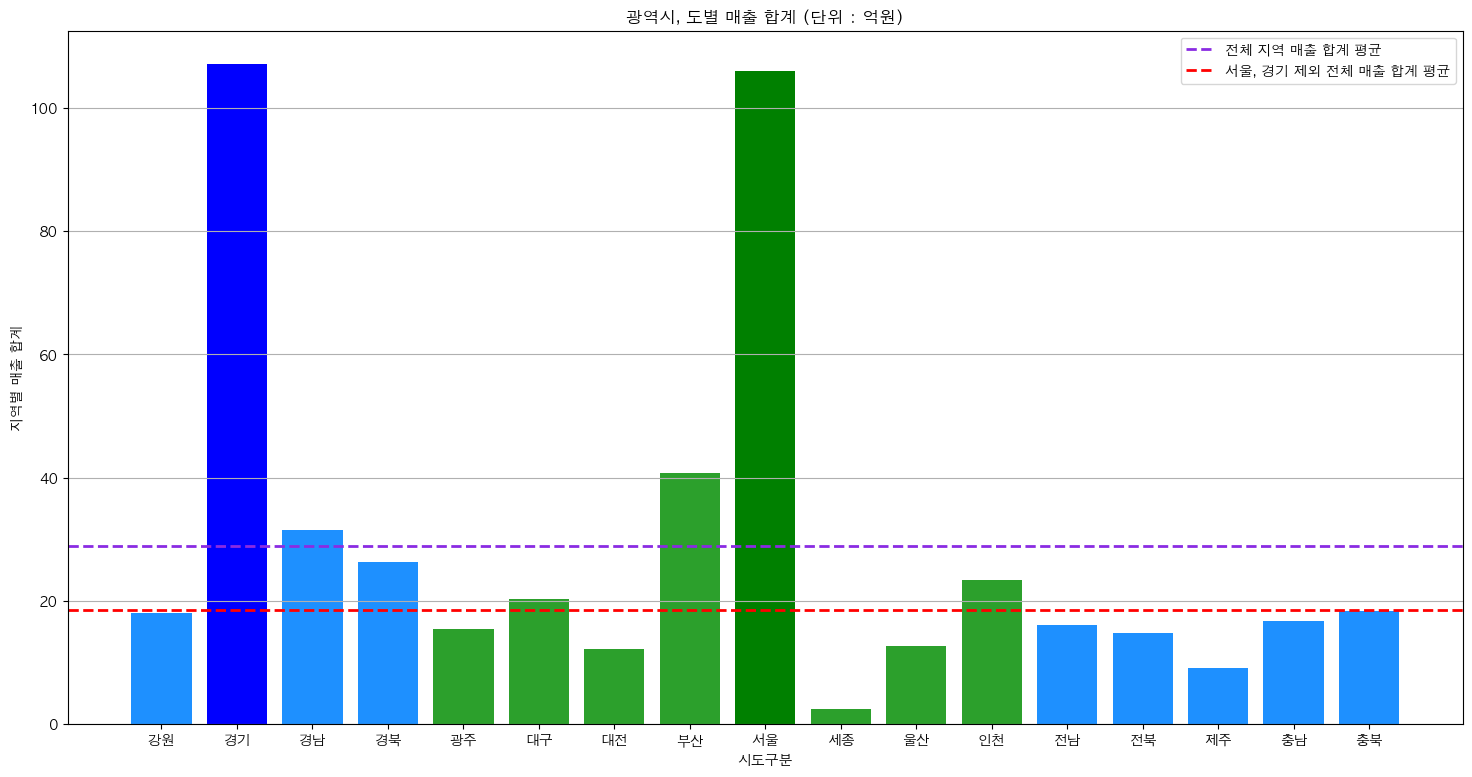

In [16]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지
c2 = ['dodgerblue', 'b','dodgerblue', 'dodgerblue',
     'C2','C2','C2','C2','g','C2', 'C2','C2',
     'dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue', 'dodgerblue']

plt.bar(grouped_dataset_dropna.sum().index, 
        grouped_dataset_dropna.sum().values, color= c2)            # 광역시, 도별 평균 매출 그래프
plt.axhline(y=dataset_dropna['amount'].sum()/(100000000*17), 
            color= 'blueviolet',linestyle ='dashed', linewidth = 2,
            label='전체 지역 매출 합계 평균')                           # 전체 지역 평균 매출 그래프 추가
plt.axhline(y=dataset_dropna_1['amount'].sum()/(100000000*15), 
            color= 'red',linestyle ='dashed', linewidth = 2,
            label='서울, 경기 제외 전체 매출 합계 평균')
plt.grid(True, axis='y')

plt.xlabel('시도구분')
plt.ylabel('지역별 매출 합계')
plt.legend(loc='best')
plt.title('광역시, 도별 매출 합계 (단위 : 억원)')

plt.show()
plt.tight_layout()

In [17]:
# 서울, 경기, 모름 제외 나머지 지역 dataset
dataset_dropna_1

,시도구분,region,amount
0,충북,충북 충주시,3000.000000
1,충북,충북 충주시,-3000.000000
2,충북,충북 충주시,10714.285714
3,충북,충북 충주시,6000.000000
4,충북,충북 충주시,3285.714286
...,...,...,...
2840569,제주,제주 제주시,-4500.000000
2840570,제주,제주 제주시,4142.857143
2840571,제주,제주 제주시,4500.000000
2840572,제주,제주 제주시,571.428571


In [18]:
# 억 단위로 표시한 서울, 경기 제외 지역별 전체 결제액

grouped_dataset_dropna_1 = (dataset_dropna_1['amount']/100000000).groupby(dataset_dropna_1['시도구분'])

In [19]:
print('서울, 경기 제외 시도구분 별 매출 합계 (단위 : 1억)\n',grouped_dataset_dropna_1.sum())
print('\n도시구분(서울, 경기 제외)별 매출 합계 평균 (단위 : 1만원) \n',int(dataset_dropna_1['amount'].sum()/(10000*15)),'만원')

서울, 경기 제외 시도구분 별 매출 합계 (단위 : 1억)
 시도구분
강원    17.938428
경남    31.460637
경북    26.303771
광주    15.380237
대구    20.245818
대전    12.073882
부산    40.765386
세종     2.411560
울산    12.704957
인천    23.301482
전남    15.970683
전북    14.765919
제주     9.033366
충남    16.644916
충북    18.245275
Name: amount, dtype: float64

도시구분(서울, 경기 제외)별 매출 합계 평균 (단위 : 1만원) 
 184830 만원


<Figure size 640x480 with 0 Axes>

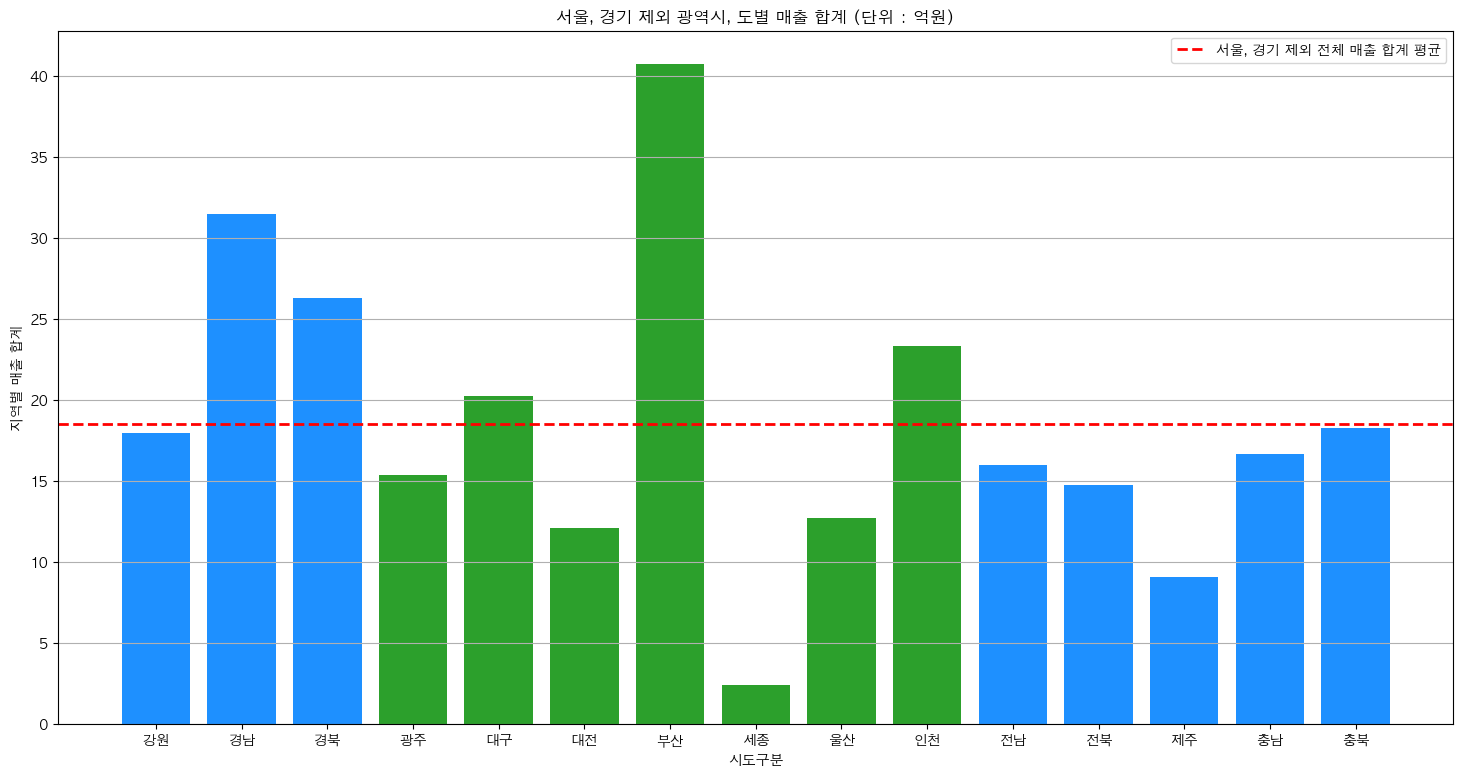

In [20]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지
c3 = ['dodgerblue','dodgerblue', 'dodgerblue',\
        'C2','C2','C2','C2','C2', 'C2','C2',\
        'dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue', 'dodgerblue']

plt.bar(grouped_dataset_dropna_1.sum().index,
        grouped_dataset_dropna_1.sum().values, color=c3)  
plt.axhline(y=dataset_dropna_1['amount'].sum()/(100000000*15), 
            color= 'red',linestyle ='dashed', linewidth = 2,
            label='서울, 경기 제외 전체 매출 합계 평균')
plt.grid(True, axis='y')

plt.xlabel('시도구분')
plt.ylabel('지역별 매출 합계')
plt.legend(loc='best')
plt.title('서울, 경기 제외 광역시, 도별 매출 합계 (단위 : 억원)')

plt.show()
plt.tight_layout()

## 4. 결제 건수 구하기

In [21]:
dataset_dropna

,시도구분,region,amount
0,서울,서울 종로구,3428.571429
1,서울,서울 종로구,3285.714286
2,서울,서울 종로구,23000.000000
3,서울,서울 종로구,15571.428571
4,서울,서울 종로구,-15571.428571
...,...,...,...
4513842,제주,제주 제주시,-4500.000000
4513843,제주,제주 제주시,4142.857143
4513844,제주,제주 제주시,4500.000000
4513845,제주,제주 제주시,571.428571


In [22]:
print('시도구분 별 평균 결제 건수 (단위 1만) \n',grouped_dataset_dropna.count()/10000)
print('\n전체 평균 결제 건수 (단위 : 건) \n',
      int(grouped_dataset_dropna.count().sum()/(17)),'건')

시도구분 별 평균 결제 건수 (단위 1만) 
 시도구분
강원    16.9791
경기    96.8836
경남    40.6190
경북    26.2338
광주    11.8015
대구    20.8424
대전    14.2478
부산    35.9042
서울    70.4437
세종     2.0218
울산    12.4640
인천    19.2439
전남    12.1978
전북    14.3514
제주    11.4671
충남    21.7040
충북    23.9796
Name: amount, dtype: float64

전체 평균 결제 건수 (단위 : 건) 
 265520 건


In [27]:
print('(서울, 경기 제외) 시도구분 별 평균 결제 건수 (단위 1만) \n',grouped_dataset_dropna_1.count()/10000)
print('\n(서울 경기 제외) 전체 평균 결제 건수 (단위 : 건) \n',
      int(grouped_dataset_dropna_1.count().sum()/(15)),'건')

(서울, 경기 제외) 시도구분 별 평균 결제 건수 (단위 1만) 
 시도구분
강원    16.9791
경남    40.6190
경북    26.2338
광주    11.8015
대구    20.8424
대전    14.2478
부산    35.9042
세종     2.0218
울산    12.4640
인천    19.2439
전남    12.1978
전북    14.3514
제주    11.4671
충남    21.7040
충북    23.9796
Name: amount, dtype: float64

(서울 경기 제외) 전체 평균 결제 건수 (단위 : 건) 
 189371 건


<Figure size 640x480 with 0 Axes>

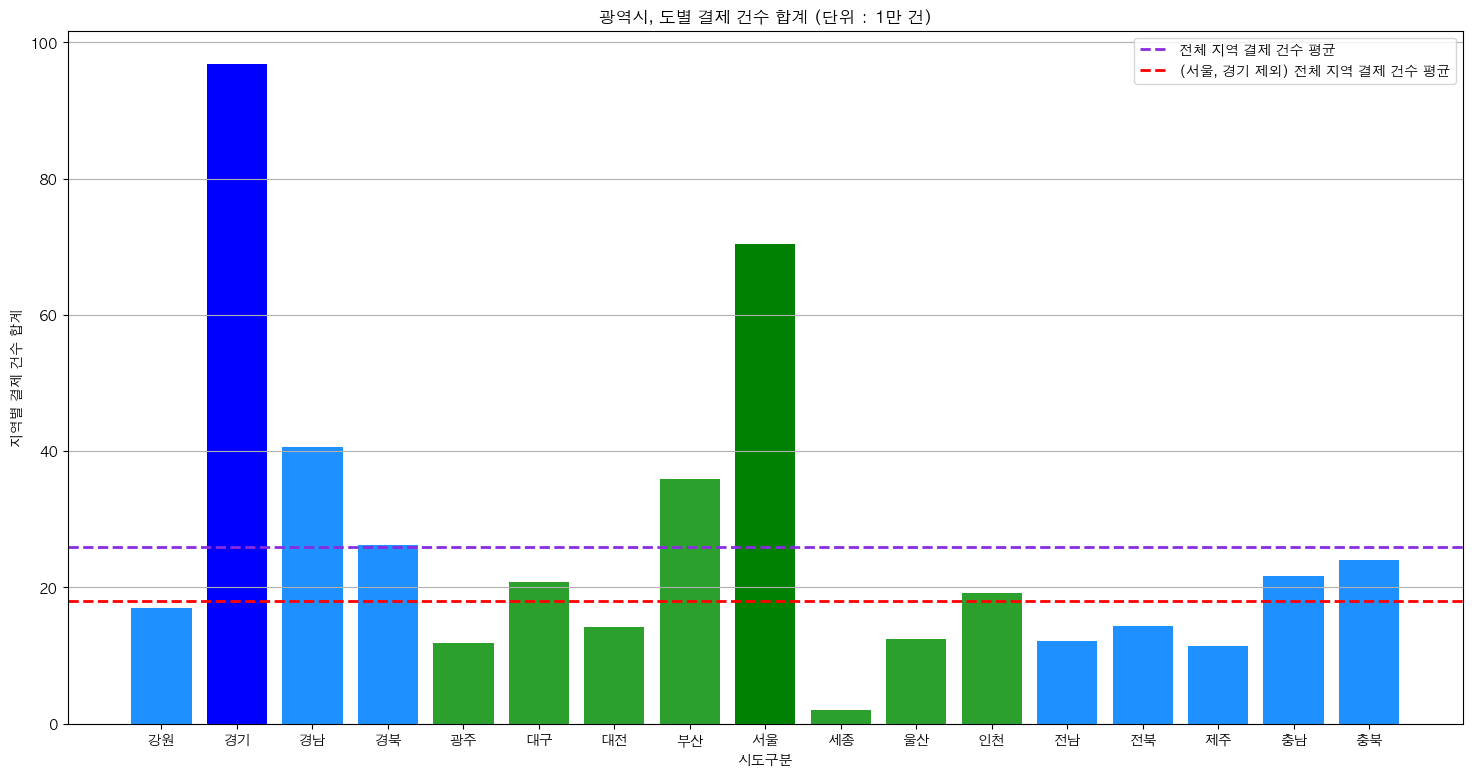

In [30]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지
c4 = ['dodgerblue', 'b','dodgerblue', 'dodgerblue',
     'C2','C2','C2','C2','g','C2', 'C2','C2',
     'dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue', 'dodgerblue']

plt.bar(grouped_dataset_dropna.count().index, 
        (grouped_dataset_dropna.count()/10000).values, color= c4)           
plt.axhline(y=int(grouped_dataset_dropna.count().sum()/(17*10000)), 
            color= 'blueviolet',linestyle ='dashed', linewidth = 2,
            label='전체 지역 결제 건수 평균')      
plt.axhline(y=int(grouped_dataset_dropna_1.count().sum()/(15*10000)), 
            color= 'red',linestyle ='dashed', linewidth = 2,
            label='(서울, 경기 제외) 전체 지역 결제 건수 평균')                                 
plt.grid(True, axis='y')

plt.xlabel('시도구분')
plt.ylabel('지역별 결제 건수 합계')
plt.legend(loc='best')
plt.title('광역시, 도별 결제 건수 합계 (단위 : 1만 건)')

plt.show()
plt.tight_layout()

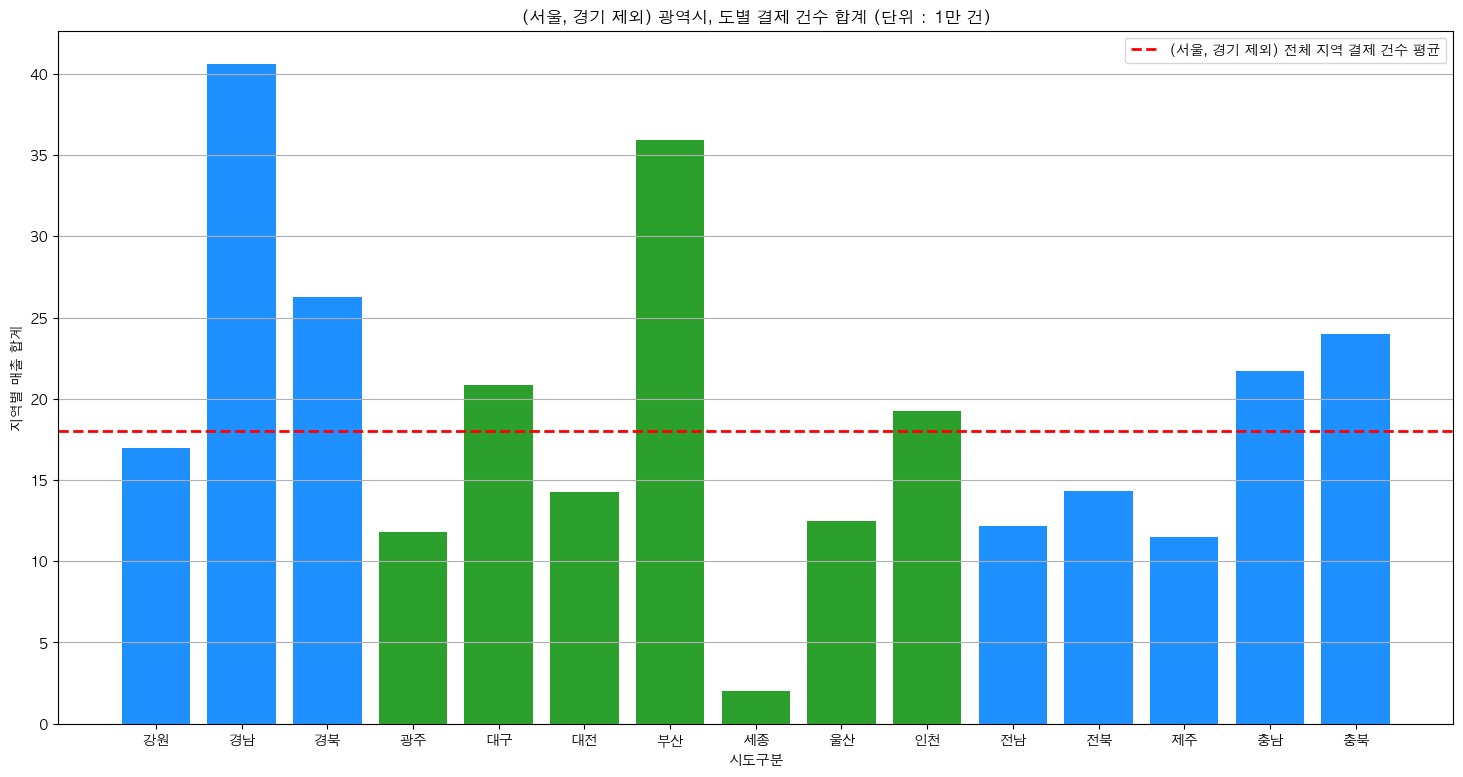

In [37]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지
c4 = ['dodgerblue','dodgerblue', 'dodgerblue',\
        'C2','C2','C2','C2','C2', 'C2','C2',\
        'dodgerblue', 'dodgerblue','dodgerblue', 'dodgerblue', 'dodgerblue']

plt.bar(grouped_dataset_dropna_1.count().index,
        (grouped_dataset_dropna_1.count()/10000).values, color=c4)   
plt.axhline(y=int(grouped_dataset_dropna_1.count().sum()/(15*10000)), 
            color= 'red',linestyle ='dashed', linewidth = 2,
            label='(서울, 경기 제외) 전체 지역 결제 건수 평균')
plt.grid(True, axis='y')

plt.xlabel('시도구분')
plt.ylabel('지역별 매출 합계')
plt.legend(loc='best')
plt.title('(서울, 경기 제외) 광역시, 도별 결제 건수 합계 (단위 : 1만 건)')

plt.show()

In [46]:
# def region_month_sales(region, datetimes): #지역-매출액

#     """ parameter
#         business_type : data['type_of_business']에 있는 업종명을 넣어주세요.
#         datetimes : 셋 중에 하나를 선택하세요. time, day, month 
#     """
    
#     dataset_ = dataset.loc[(dataset['big_region'] == region), ['amount_small',datetimes]]
#     group = dataset_['amount_small'].groupby(dataset_[datetimes]) 

#     fig = px.line(group.sum(), title = region + " 월별 매출")
#     fig.show()

일단 여기까지


In [36]:
# fillna를 통해서 nan 값을 대치해줌
region_1 = region_.fillna('모름')
# 지역별로 amount를 묶음
region_2 = region_1['amount'].groupby(region_1['region'])
# 지역별 amount의 평균을 dataframe으로 만듦
region_3 = pd.DataFrame(region_2.mean()) 
region_3

,amount
region,
강원 강릉시,7409.415484
강원 삼척시,8023.419596
강원 속초시,16593.699141
강원 양구군,10799.438604
강원 원주시,8507.560292
...,...
충북 제천시,5655.039867
충북 증평군,5261.246131
충북 진천군,4370.129740


In [37]:
# index로 분류되어 있는 지역을 칼럼으로 지정하기 위해 인덱스 칼럼을 추가함
region_3.insert(0, column='index', value=range(0,181,1))
region_3

,index,amount
region,,
강원 강릉시,0,7409.415484
강원 삼척시,1,8023.419596
강원 속초시,2,16593.699141
강원 양구군,3,10799.438604
강원 원주시,4,8507.560292
...,...,...
충북 제천시,176,5655.039867
충북 증평군,177,5261.246131
충북 진천군,178,4370.129740


In [46]:
# 만든 index를 새로운 index로 지정함
big_region_data = region_3.reset_index().set_index('index')
big_region_data

,region,amount
index,,
0,강원 강릉시,7409.415484
1,강원 삼척시,8023.419596
2,강원 속초시,16593.699141
3,강원 양구군,10799.438604
4,강원 원주시,8507.560292
...,...,...
176,충북 제천시,5655.039867
177,충북 증평군,5261.246131
178,충북 진천군,4370.129740


In [47]:
# 광역시, 도별로 분류하기 위한 작업 (new column 생성)
big_region_data['big_region'] = big_region_data['region'].str[0:2]
big_region_data

,region,amount,big_region
index,,,
0,강원 강릉시,7409.415484,강원
1,강원 삼척시,8023.419596,강원
2,강원 속초시,16593.699141,강원
3,강원 양구군,10799.438604,강원
4,강원 원주시,8507.560292,강원
...,...,...,...
176,충북 제천시,5655.039867,충북
177,충북 증평군,5261.246131,충북
178,충북 진천군,4370.129740,충북


In [48]:
# 지역별 매출 그룹화 후, 평균 값 도출

grouped_big_region_data = big_region_data['amount'].groupby(big_region_data['big_region'])
grouped_big_region_data.mean()

big_region
강원     9946.059429
경기    12366.297121
경남     8438.555506
경북    10891.238790
광주    13608.727891
대구    10834.778180
대전     6791.773688
모름     9482.203503
부산    11240.258076
서울    13124.439885
세종    10045.499691
울산     9615.141335
인천    12321.094937
전남    15822.592490
전북     9136.034296
제주     7633.419527
충남     7135.346421
충북     8421.124220
Name: amount, dtype: float64

In [69]:
# 전체 지역 평균 매출
big_region_data['amount'].mean()

11073.538494693754

<Figure size 640x480 with 0 Axes>

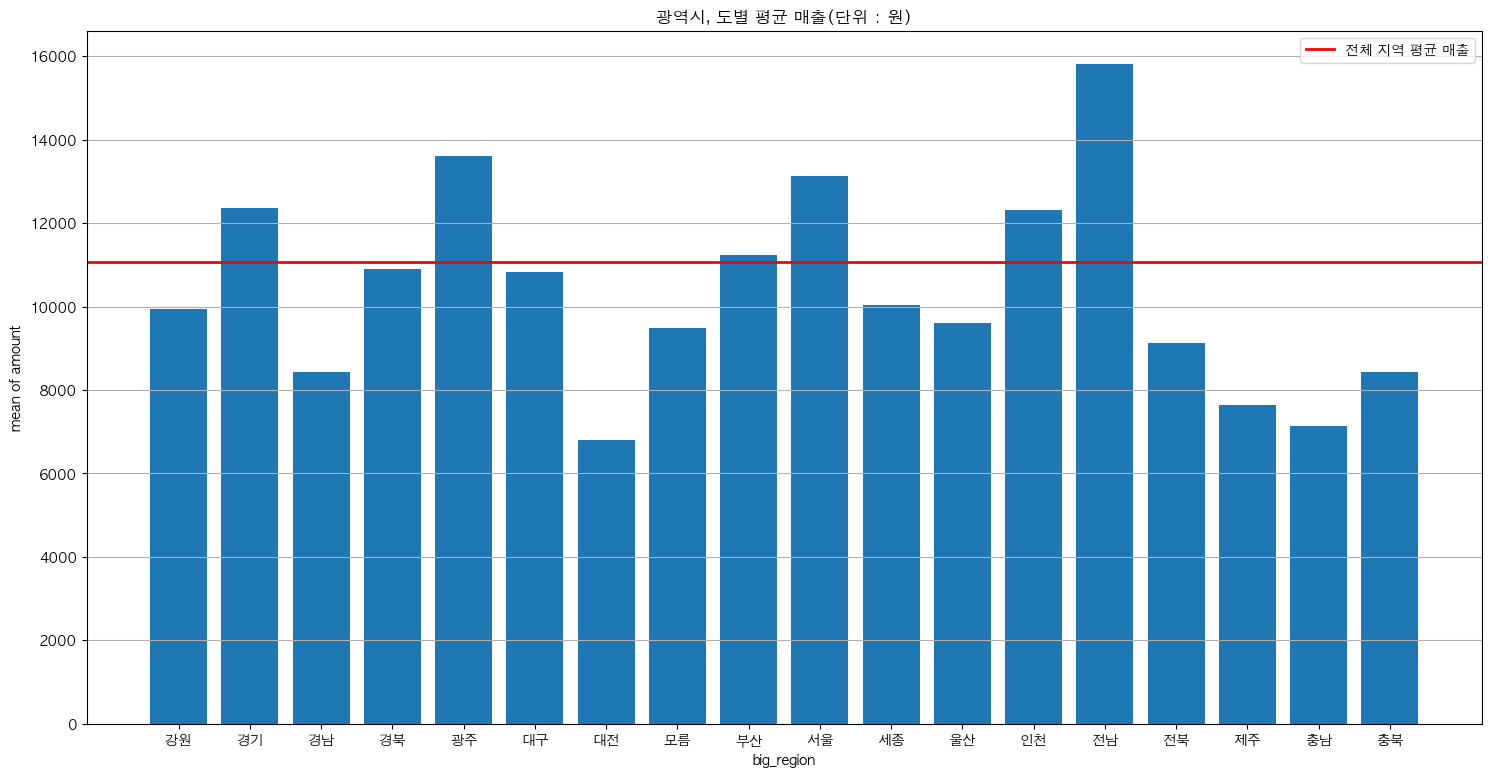

In [78]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지

plt.bar(grouped_big_region_data.mean().index, grouped_big_region_data.mean().values)                # 광역시, 도별 평균 매출 그래프
plt.axhline(y=big_region_data['amount'].mean(), color= 'r', linewidth = 2, label='전체 지역 평균 매출') # 전체 지역 평균 매출 그래프 추가
plt.grid(True, axis='y')

plt.xlabel('big_region')
plt.ylabel('mean of amount')
plt.legend(loc='best')
plt.title('광역시, 도별 평균 매출(단위 : 원)')

plt.show()
plt.tight_layout()

## 2. 합계 구하기

In [109]:
# sum 데이터프레임 생성

region_1 = region_.fillna('모름')
region_2 = region_1['amount'].groupby(region_1['region'])
region_3_sum = pd.DataFrame(region_2.sum()) 
region_3_sum.insert(0, column='index', value=range(0,181,1))
big_region_data_sum = region_3_sum.reset_index().set_index('index')
big_region_data_sum['big_region'] = big_region_data_sum['region'].str[0:2]

# 지역별 분류

grouped_big_region_data_sum = (big_region_data_sum['amount']/100000000).groupby(big_region_data_sum['big_region']) # 단위 (억원) 변환
grouped_big_region_data_sum.sum()

big_region
강원     17.938428
경기    107.236676
경남     31.460637
경북     26.303771
광주     15.380237
대구     20.245818
대전     12.073882
모름    193.699229
부산     40.765386
서울    106.007643
세종      2.411560
울산     12.704957
인천     23.301482
전남     15.970683
전북     14.765919
제주      9.033366
충남     16.644916
충북     18.245275
Name: amount, dtype: float64

In [ ]:
subset = dataset.loc[(dataset['시도구분']) != '지역']

In [110]:
big_region_data_sum['amount'].sum()/100000000

684.1898670257143

No handles with labels found to put in legend.


<Figure size 640x480 with 0 Axes>

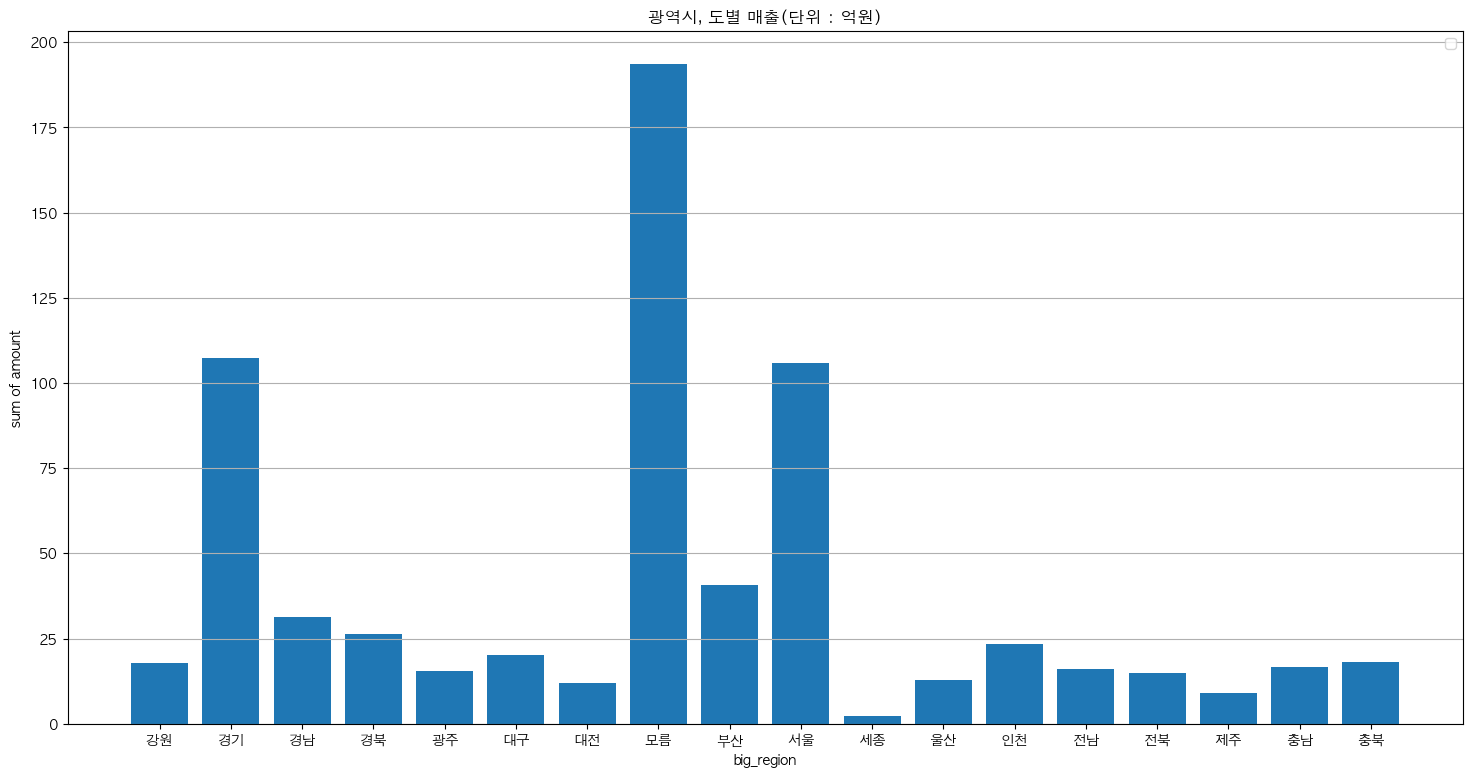

In [100]:
plt.figure(figsize=(18, 9))

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 깨짐 방지

plt.bar(grouped_big_region_data_sum.sum().index, grouped_big_region_data_sum.sum().values)                # 광역시, 도별 평균 매출 그래프
#plt.axhline(y=big_region_data['amount'].sum(), color= 'r', linewidth = 2, label='전체 지역 평균 매출') # 전체 지역 평균 매출 그래프 추가
plt.grid(True, axis='y')

plt.xlabel('big_region')
plt.ylabel('sum of amount')
plt.legend(loc='best')
plt.title('광역시, 도별 매출(단위 : 억원)')

plt.show()
plt.tight_layout()

In [72]:
import numpy as np
b = (region_4['region'].tolist())
b

['강원 강릉시',
 '강원 삼척시',
 '강원 속초시',
 '강원 양구군',
 '강원 원주시',
 '강원 철원군',
 '강원 춘천시',
 '강원 태백시',
 '강원 홍천군',
 '강원 횡성군',
 '경기 가평군',
 '경기 고양시',
 '경기 과천시',
 '경기 광명시',
 '경기 광주시',
 '경기 구리시',
 '경기 군포시',
 '경기 김포시',
 '경기 남양주시',
 '경기 동두천시',
 '경기 부천시',
 '경기 성남시',
 '경기 수원시',
 '경기 시흥시',
 '경기 안산시',
 '경기 안성시',
 '경기 안양시',
 '경기 양주시',
 '경기 양평군',
 '경기 연천군',
 '경기 오산시',
 '경기 용인시',
 '경기 의왕시',
 '경기 의정부시',
 '경기 이천시',
 '경기 파주시',
 '경기 평택시',
 '경기 포천시',
 '경기 하남시',
 '경기 화성시',
 '경남 거제시',
 '경남 거창군',
 '경남 김해시',
 '경남 남해군',
 '경남 밀양시',
 '경남 사천시',
 '경남 양산시',
 '경남 진주시',
 '경남 창녕군',
 '경남 창원시',
 '경남 통영시',
 '경남 함안군',
 '경북 경산시',
 '경북 경주시',
 '경북 구미시',
 '경북 김천시',
 '경북 상주시',
 '경북 성주군',
 '경북 안동시',
 '경북 영주시',
 '경북 영천시',
 '경북 울진군',
 '경북 칠곡군',
 '경북 포항시',
 '광주 광산구',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서구',
 '대구 달성군',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성구',
 '대구 중구',
 '대전 대덕구',
 '대전 동구',
 '대전 서구',
 '대전 유성구',
 '대전 중구',
 '모름',
 '부산 강서구',
 '부산 금정구',
 '부산 기장군',
 '부산 남구',
 '부산 동구',
 '부산 동래구',
 '부산 부산진구',
 '부산 북구',
 '부산 사상구',
 '부

In [1]:
dataset['region'] = dataset['regjon'].str[0:2]

NameError: name 'dataset' is not defined